<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introdução" data-toc-modified-id="Introdução-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introdução</a></span></li><li><span><a href="#Sound-and-Waveforms" data-toc-modified-id="Sound-and-Waveforms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sound and Waveforms</a></span></li><li><span><a href="#Intensity,-Loudness-and-Timbre" data-toc-modified-id="Intensity,-Loudness-and-Timbre-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Intensity, Loudness and Timbre</a></span></li><li><span><a href="#Understanding-audio-Signals-for-ML" data-toc-modified-id="Understanding-audio-Signals-for-ML-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Understanding audio Signals for ML</a></span></li><li><span><a href="#Types-of-Audio-Features-for-Machine-Learning" data-toc-modified-id="Types-of-Audio-Features-for-Machine-Learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Types of Audio Features for Machine Learning</a></span></li><li><span><a href="#How-to-Extract-Audio-Features" data-toc-modified-id="How-to-Extract-Audio-Features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>How to Extract Audio Features</a></span></li><li><span><a href="#Time-domain-audio-features" data-toc-modified-id="Time-domain-audio-features-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Time-domain audio features</a></span></li></ul></div>

Este notebook tem por objetivo consolidar anotações e códigos relacionados a série de vídeos do [canal](https://www.youtube.com/channel/UCZPFjMe1uRSirmSpznqvJfQ) **Valerio Velardo - The Sound of IA** intitulada _Audio Signal Processing for Machine Learning_ e disponbilizada gratuitamente no YouTube.

A série conta com um compilado de vídeos explicativos sobre sinais de áudio, seus componentes básicos e formas de extrair valor, features e características relevantes dentro de contextos atrelados a Machine Learning e Deep Learning. A grande motivação em construir este documento de anotação é aproveitar seu conteúdo futuramente em tópicos avançados, permitindo adicionar complementos úteis nas análises de áudios a serem propostas no Trabalho de Graduação.

# Introdução

# Sound and Waveforms

# Intensity, Loudness and Timbre

Após uma abordagem inicial sobre os áudios e suas características básicas, como por exemplo _período_, _frequência_ e _amplitude_, nesta sessão serão colocadas em pauta algumas features adicionais de sinais de áudio, tais quais:

* _Intensidade_
* _Potência_
* _Altura_
* _Timbre_

___

Em um primeiro momento, vamos definir os dois primeiros conceitos iniciais da lista acima.

**Potência:** taxa a qual a energia é transferida. Em outras palavras, trata-se da energia por unidade de tempo emitida por uma fonte sonora em todas as direções. Medida em Watts (W).

**Intensidade:** potência por unidade de área. Medida em W/m².

Após essa definição, é feita uma introdução a dois conceitos interessantes relacionados ao range de percepção humana. O termo _Threshold of Hearing_ (ou $TOH$) é responsável por pontuar que a percepção humana de sons está atrelada a intensidade baixíssimas e. Do outro lado, tem-se o conceito de _Threshold of Pain_ (ou $TOH$), sendo este vinculado aos limites humanos de noção de intensidades sonoras.

$$TOH=10^{-12}W/m²$$

$$TOP=10W/m²$$

___
Analisando os fatores de $TOH$ e $TOP$, percebe-se que o range entre os limiares de percepção do ser humano é extremamente elevado, alcançado a ordens de $10^{13}$. Dessa forma, é comum que se veja abordagens relacionadas ao _nível de intensidade_ em uma escala logaritma medida em decibéis (dB). Com isso, utilizando uma intensidade de referência $(TOH)$, há uma maior facilidade em analisar nuances dentro desse intervalo de alta magnitude. A conversão, em $dB$, de uma intensidade dada em $W/m²$, gira em torno da seguinte fórmula:

$$dB(I)=10\log_{10}\left(\frac{I}{I_{TOH}}\right)$$

É importante citar que, a cada aproximadamente 3dBs, a intensidade dobra. A tabela abaixo mostra uma relação curiosa sobre os parâmetros de intensidade de alguns eventos.

| Source | Intensity | Intensity Level | x TOH |
| --- | --- | --- | --- |
| Threshold of Hearing (TOH) | $10^{-12}$ | 0 dB | 1 |
| Whisper | $10^{-10}$ | 20 dB | $10^{2}$ |
| Pianissimo | $10^{-8}$ | 40 dB | $10^{4}$ |
| Normal conversation | $10^{-6}$ | 60 dB | $10^{6}$ |
| Fortissimo | $10^{-2}$ | 100 dB | $10^{10}$ |
| Threshold of Pain | $10$ | 130 dB | $10^{13}$ |
| Jet take-off | $10^{2}$ | 140 dB | $10^{14}$ |
| Instant perforation of eardrum | $10^{4}$ | 160 dB | $10^{16}$ |

_Fonte: Muller, FMP, Springer 2015_

___
Seguindo com as definições básicas de sinais de áudio, temos:

**Altura (loudness):**
* Percepção subjetiva da intensidade sonora;
* Depende da duração e frequência de um som;
* Depende da idade de quem está ouvindo;
* Medida em _phons_

**Timbre:** característica altamente subjetiva que envolve uma série de parâmetros "abastratos", como:
* Cor do som;
* Diferença entre dois sons de mesma intensidade, frequência e duração (exemplo de mesma nota tocada em um violino e em um trompete);
* Descrita em palavras como: bright, dark, harsh, warm.

Não é possível ter precisão ao definir o Timbre, porém sabe-se que:
* O timbre é multidimensional;
* Envelope do som (Attack/Decay/Sustain/Retain - A/D/S/R/);
* Harmônicos (frequência fundamental e distribuição de energia em frequências parciais);
* Modulação em amplitudade (trêmolo) e frequência (vibrato).

# Understanding audio Signals for ML

Após uma abordagem detalhada sobre ondas sonoras e suas principais características, como frequência, potência, intensidade e timbre, é importante definir alguns conceitos relacionados a conversão de uma onda analógica para sinais digitais que podem ser processados e analisados computacionalmente.

> 📌 **Nota**: um sinal de áudio pode ser considerado uma representação do som, consolidando todas as informações necessárias para reproduzir este som. Entretanto, existe uma barreira relacionada ao som analógico original dado como uma onda mecânica e sua representação digital.

___
**_Sinal analógico_**
___

* Valores contínuos para amplitude;
* Valores contínuos para tempo;
___

**_Sinal digital_**
___

* Sequência discreta de valores;
* Pontos de dados podem apenas obter valores finitos;

___
**_Conversão Analógico para Digital (ADC)_**
___

* _Sampling_

$$s_r = \frac{1}{T}$$

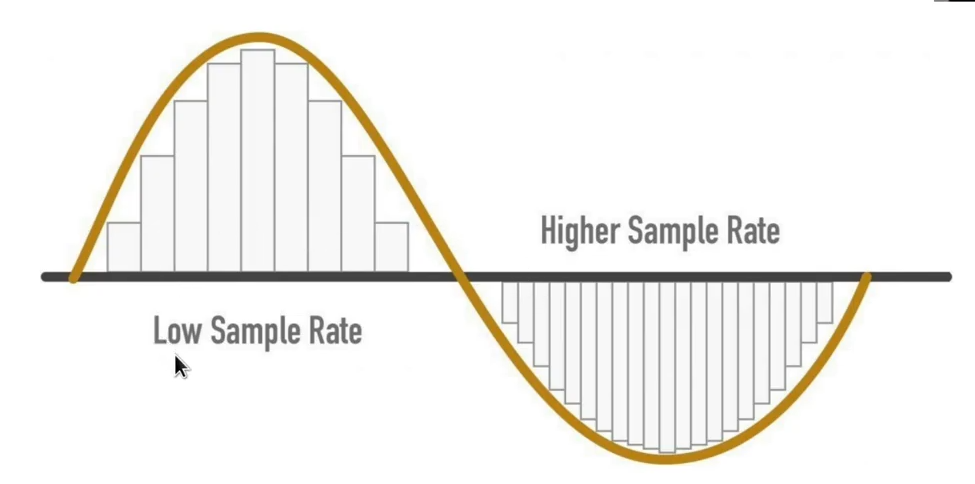

Durante a amostragem, é possível pontuar que a diferença entre a área abaixo da curva senoidal e a área obtida pelas barras de amostragem é dada como o erro de amostragem. Basicamente, é uma informação que foi perdida durante o processo. Comparando as duas parcelas acima, percebe-se que quanto menor a taxa de amostragem, maior o erro de amostragem e, por consequência, maior o nível de informação perdida. Entretanto, existe um tradeoff computacional em aumentar a taxa de amostragem.

* _Frequência de Nyquist_

$$f_N=\frac{s_r}{2}$$

A frequência de Nyquist demonstra um conceito altamente ligado com a amostragem. Trata-se de um limiar de frequência considerado ideal para uma amostragem sem perdas ou sem a criação de artefatos (aliasing). Em muitas aplicações, é possível encontrar cenários digitais com uma taxa de amostragem de 44100Hz e, na prática, isso tem razões relacionadas ao limiar de percepção humana:

$$f_N=\frac{44100}{2}=22050$$
___

* Quantization (quantização);
    * Resolução = número de bits
    * Bit depth
    * Resolução do CD: 16 bits ($2^{16}=65536$)
    

        * Tópico a ser observado futuramente: PCM (Pulse-code Modulation)
        
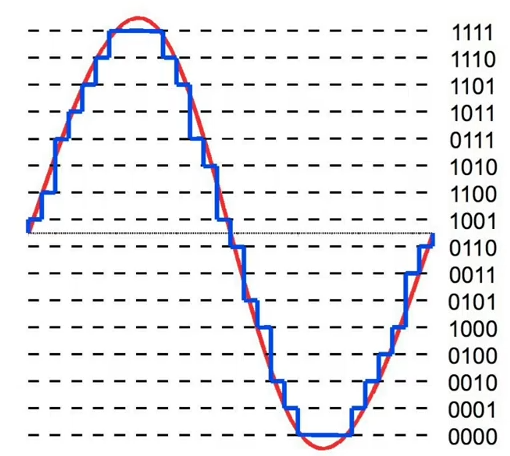

    * Signal-to-quantization-noise ratio
    
Relação que envolve o erro de quantização
$$SQNR \approx 6.02*Q$$

$$SQNR(16) \approx 96dB$$

# Types of Audio Features for Machine Learning

Features de áudio são elementos que caracterizam o sinal de modo a propor uma completa diferenciação entre diferentes sinais. Em uma categorização prática, é possível considerar features de áudio em:

* _Level of abstraction_
* _Temporal scope_
* _Music aspect_
* _Signal domain_
* _ML approach_

___
**_Level of abstraction_**
___

A imagem a seguir traz uma visão geral sobre o nível de abstração de algumas features de áudio

Basicamente, quanto menor o nível de abstração, menos interpretável é a feature para o ser humano. Ao observar as features de áudio que compõem o tópico _Low-level_, percebe-se que tratam-se de features que fazem pouco sentido prática para o ser humano mas que, em termos de linguagem de máquina, são relevantes. Na prática, são elementos estatísticos que podem ser extraídos de sinais de áudio.

Nos níveis superiores (_Mid e High-level_), é possível encontrar features com maior significado prático por ser humano, permitindo uma abstração maior sobre que se está analisando.

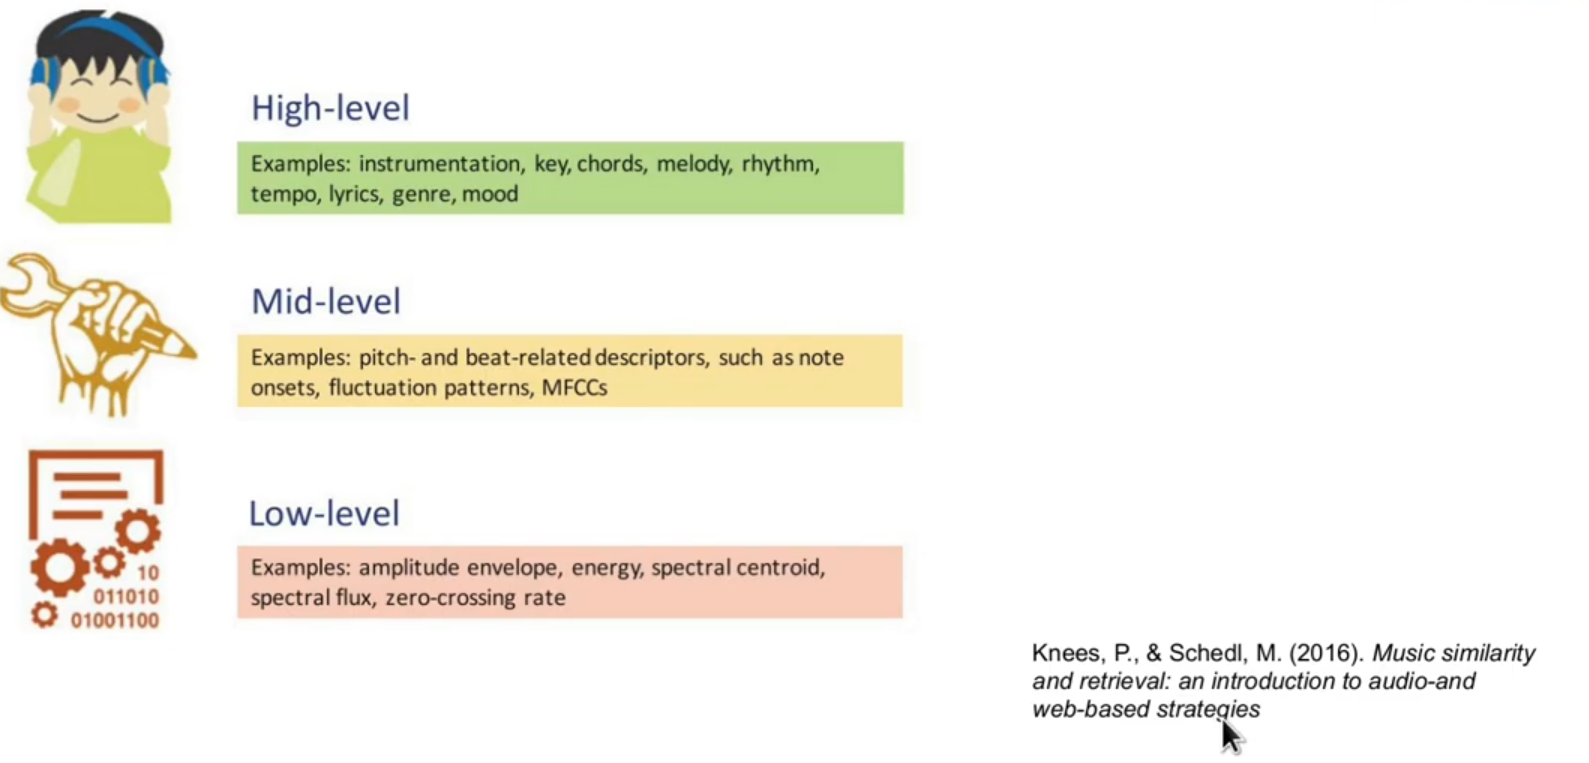

___
**_Temporal scope_**
___

Nessa categoria, as features podem ser aplicadas a qualquer tipo de sinal, seja ele musical ou não. É possível dividir as features dessa categoria em três subcategorias:

* _Instantaneous (~50ms)_: features relacionadas a pequenas parcelas do sinal, permitindo análises pontuais e instantâneas;
* _Segment-level (seconds)_: features extraídas em parcelas de duração na grandeza de segundos;
* _Global_: features extraídas a partir da análise completa do sinal

___
**_Musical aspect_**
___

Categoria relacionada única e exclusivamente a música. Alguns exemplos:

* _Beat_
* _Timbre_
* _Pitch_
* _Harmony_

___
**_Signal domain_**
___

Provavelmente a categoria mais importante em termos de diferenciação de sinais de áudio. Relacionada ao domínio dos sinais, temos como exemplos:

* **_Time domain_**: features extraídas de formas de onda
    * Amplitude envelope
    * Root-mean square energy
    * Zero crossing rate
    * ...
    
    
* **_Frequency domain_**: features extraídas do espectro de frequências (Transformada de Fourier)
    * Band energy ratio
    * Spectral centroid
    * Spectral flux
    * ...
    
    
* **_Time-frequency domain_**: features extraídas no domínio combinado entre tempo e frequência
    * Spectogram
    * Mel-spectrograms
    * Constant-Q transform
    * ...

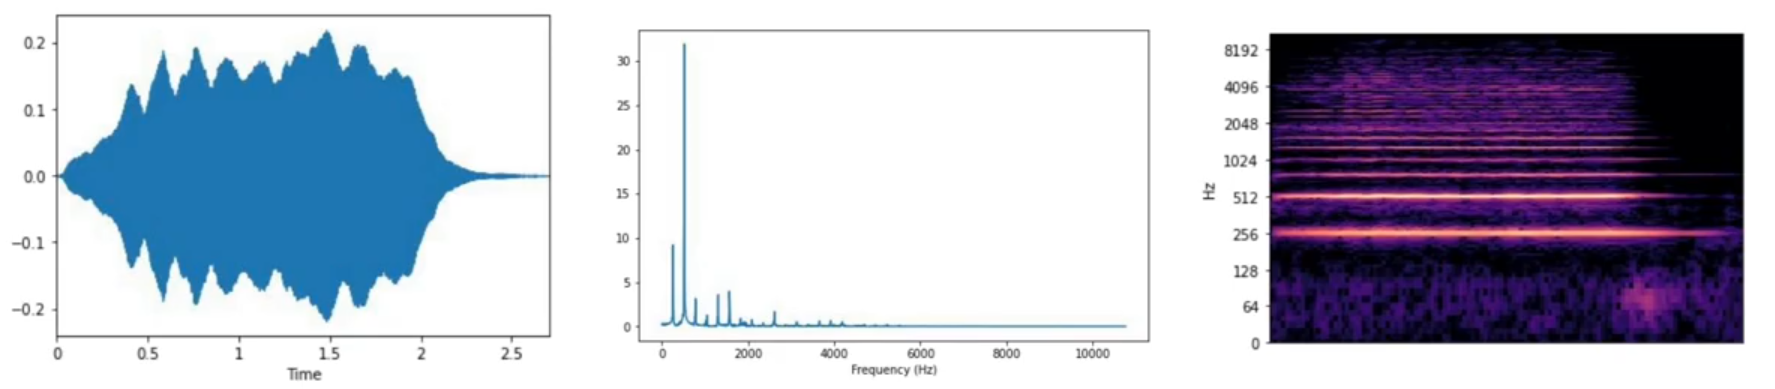

___
**_ML approach_**
___

Essa categoria pode ser dividia em:

* **_Traditional Machine Learning_**: seleção de features pro contexto e treinamento de modelos de mL
    * Amplitude envelope
    * Root-mean square energy
    * Zero crossing rate
    * Band energy ratio
    * Spectral centroid
    * Spectral flux
    * Spectral sperad
    * Spectral roll-off
    * ...
    
 
* **_Deep Learning_**: input do áudio bruto ou spectrogramas para treinamento da rede e coleta dos resultados

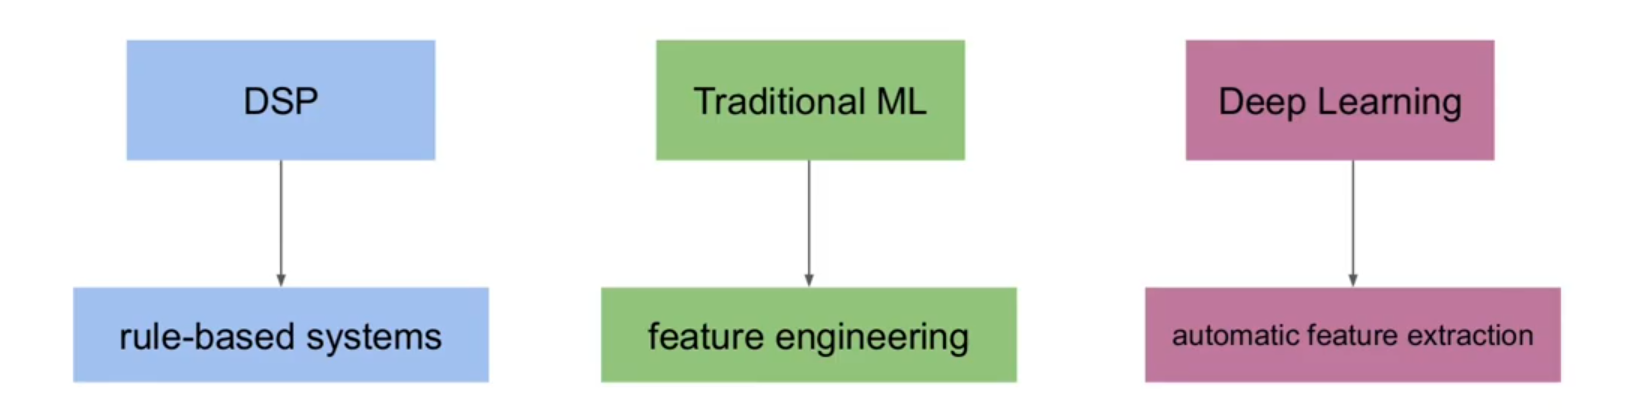

# How to Extract Audio Features

Após uma longa jornada de entendimento das principais features que compõem um sinal de áudio, é chegado o momento de analisar formas de extraír tais features. Em um primeiro momento, vamos analisar o conjunto de features relacionados ao domínio do sinal.

___
**_Time domain features pipeline_**
___

A figura abaixo traz uma visão geral sobre um processo padrão de coleta, transformação e análise de um sinal analógico de áudio oriundo de um instrumento. Até o momento atual, os processos de geração e conversão ADC (analógica para digital) foram detalhados a partir dos conceitos de _amostragem_ e _quantização_. Entretanto, no pipeline abaixo, tem-se um novo passo realizado após o processo de conversão ADC: trata-se do processo de _framing_. Na tabela relacionada, é possível perceber a separação do sinal digital em _frames_ compostos por diferentes intervalos de tempo do sinal sobrepostos uns aos outros.

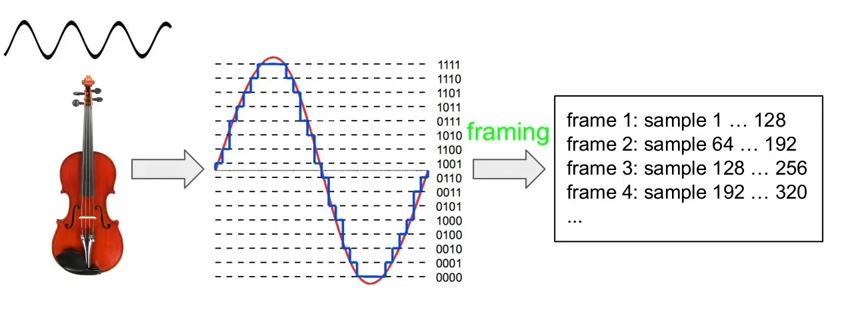

___
**_Framing_**
___
A grande ideia por trás do processo de _framing_ é a coleta de _chunks_ de áudio que são perceptíveis. Neste ponto, é extremamente importante citar que o ouvido humano possui uma resolução de percepção da ordem de 10ms. Em outras palavras, significa dizer que qualquer amostra de áudio menor que 10ms é imperceptível aos ouvidos humanos.

Dessa forma, uma única amostra de um sinal de áudio amostrado a uma taxa de 44.1KHz tem, na prática, uma duração de 0.0227ms. Isto pois:

$$1 \text{ sample } @44.1KHz \rightarrow 1 * \frac{1}{44.1KHz}=0.0227ms$$

Assim, uma única amostra de um sinal de áudio amostrado a uma taxa padrão possui uma duração muito abaixo da resolução mínima perceptível ao ouvido humano. A uma perspectiva acústica, faz mais sentido coletar amostras (ou frames) com uma duração além do mínimo perceptível, permitindo assim análises mais ricas e com maior relevância prática em termos de aplicações de áudio.

Por fim, é possível resumir o processo de _framing_ nos seguintes tópicos:

* _Chuncks de áudios "percebíveis"
* _Normalmente escolhido em potências de 2
* _Valores típicos entre 256 a 8192

A fórmula para calcular a duração de um frame é dada por:

$$d_f = \frac{1}{s_f}.K$$

Onde $s_r$ é a taxa de amostragem (ou _sampling rate_) e $K$ é a quantidade de amostras do frame. Exemplo de duração de um frame com taxa de amostragem igual a 44.1KHZ e frame de 512 amostras:

$$d_f = \frac{1}{s_r}.K = \frac{1}{44100}. 512 = 11.6ms$$

Uma vez entendido o conceito de _framing_, é possível completar então o pipeline de extração de features de áudios no domínio do tempo com:

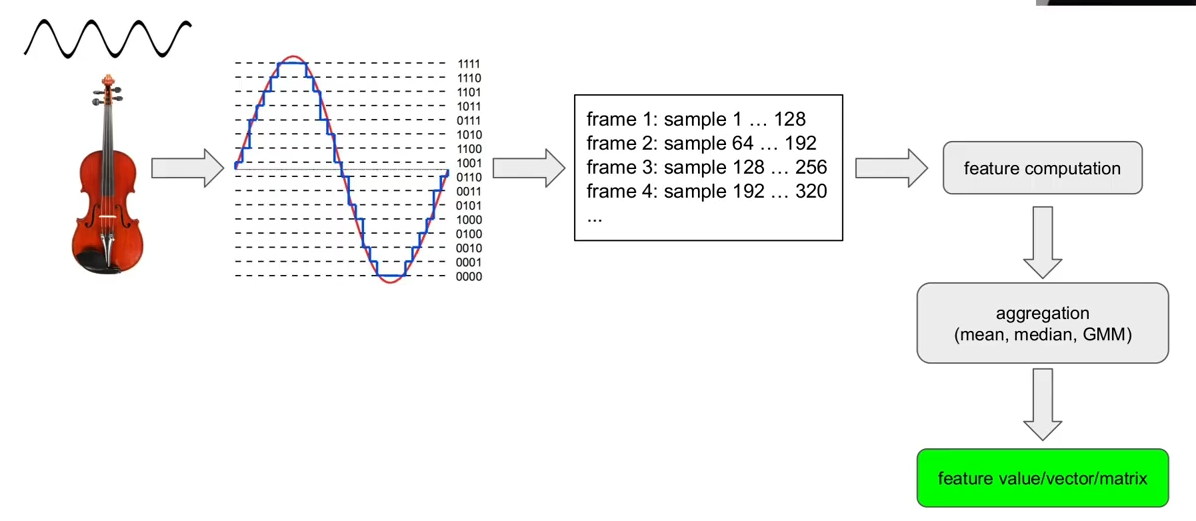

___
**_Frequency domain features pipeline_**
___

Nos tópicos acima, foi representado um processo completo de extração de features de sinais no domínio do tempo. O processo para extração de features no domínio da frequência é relativamente similar, necessitando apenas de uma aplicação da transformada de Fourier para a transformação do sinal original, no domínio do tempo para o domínio da frequência. 

Entretando, existem alguns fatores naturais que podem, de certa forma, complicar a extração de features de um sinal no domínio da frequência. O primeiro deles será explicado logo a seguir:

___
**_Spectral leakage_**
___

O efeito de vazamento de frequência (ou _spectral leakage_) ocorre quando é processado um sinal com um número não inteiro de períodos. Na prática, isso ocorre a todo momento e seus efeitos estão atrelados a descontinuidade dos _endpoints_ dos sinais. A figura abaixo mostra um exemplo prática de um sinal real. Como o número de períodos não é um inteiro, o sinal se torna descontínuo.

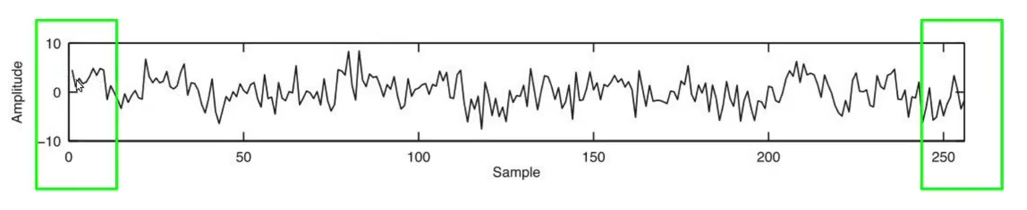

Essa descontinuidade causa o aparecimento de componentes de alta frequência não presentes no sinal original. Tais componentes poderiam ser vistos, após a aplicação da transformada de Fourier, como elementos de alta frequência indesejados de magnitudes relevantes no espectro de frequências. Exemplo:

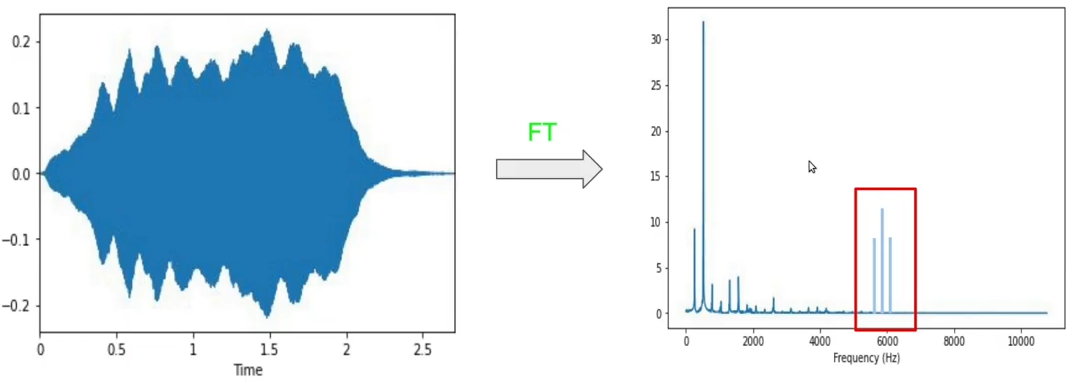

Neste cenário, a primeira pergunta que se faz é: existe alguma forma de tratar esse vazamento de frequências e o consequente aparecimento de componentes indesejadas de alta frequência no espectro final? Felizmente, a resposta é positiva e possui um nome claro: _windowing_

___
**_Windowing_**
___

A ideia básica por trás do processo de windowing está atrelada a aplicação de uma função _window_ em cada frame antes da aplicação da transformada de Fourier. Dessa forma, são eliminadas as amostras _endpoints_ de cada frame, gerando assim um sinal periódico e, portanto, eliminando o vazamento de frequências.

Na grande maioria das aplicações, a função _window_ aplicada é a _Hann window_, sendo esta definida por:

$$w(k) = 0.5 . \left(1 - \cos\left(\frac{2\pi k}{K-1}\right)\right), k=1...K$$

Onde K representa as amostras. Abaixo, temos uma representação gráfica da função Hann para 50 amostras.

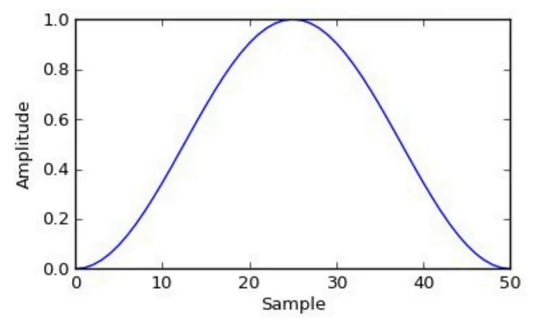

Assim, em uma aplicação prática do processo de _windowing_, vamos utilizar o mesmo sinal real utilizado alguns tópicos acima

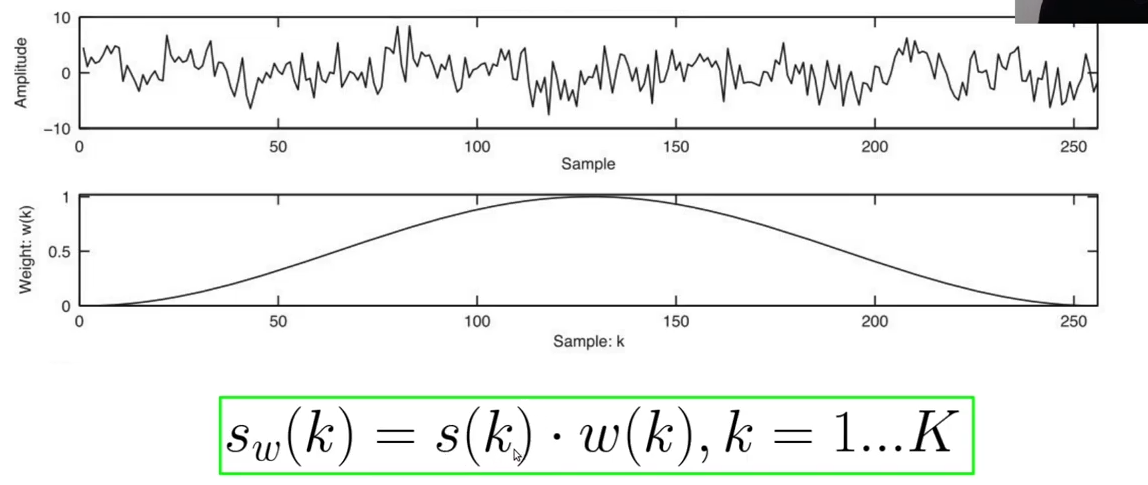

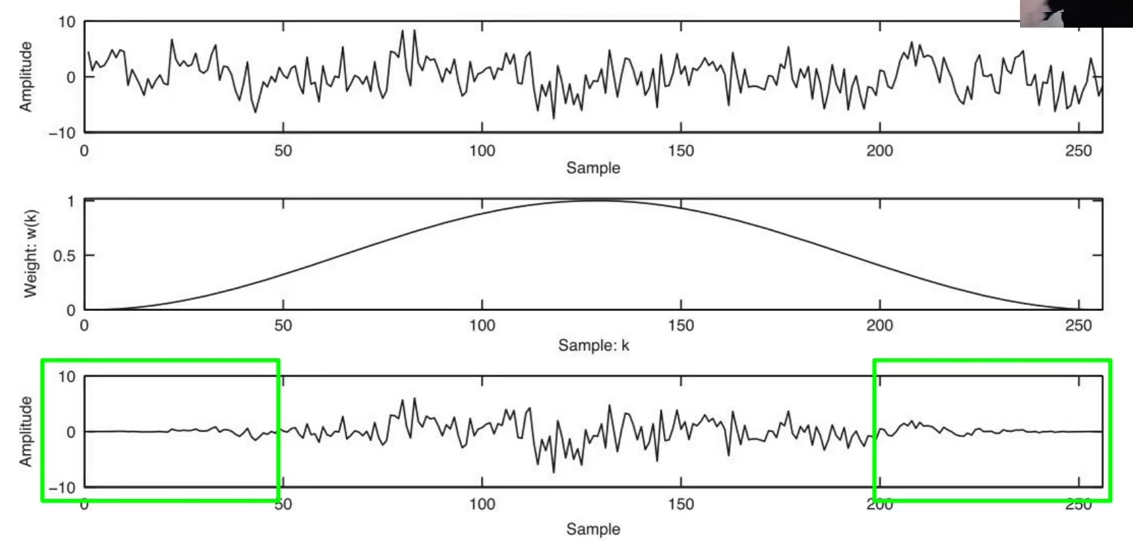

Os efeitos da aplicação da função Hann para o processo de _windowing_ podem ser visualizados acima. Matematicamente, o sinal original, representado pelo termo $s(k)$ é multiplicado pela função Hann representada pelo termo $w(k)$. O resultado prático é um sinal com os _endpoints_ suavizados até o alcance da amplitude nula, se tornando assim um sinal periódico uma vez que a descontinuidade é eliminada.

Porém, o efeito direto dessa aplicação causa um outro problema: a perda de sinal/informação. Intuitivamente falando, essa suavização dos _endpoints_ faz com que, ao concatenar os frames suavizados, elementos do sinal sejam perdidos, o que é, de fato, algo totalmente indesejado.

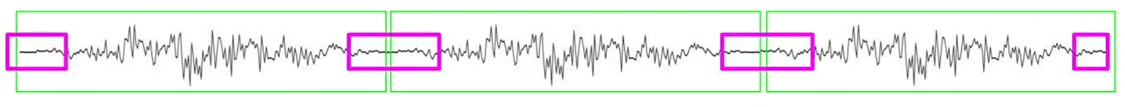

Como resolver este problema? Resposta: **OVERLAPPING FRAMES** (assim respondemos o questionamento inicial sobre os motivos por trás da sobreposição de frames em um sinal de áudio). A figura abaixo tráz um exemplo prático do processo de _framing_ usualmente realizado:

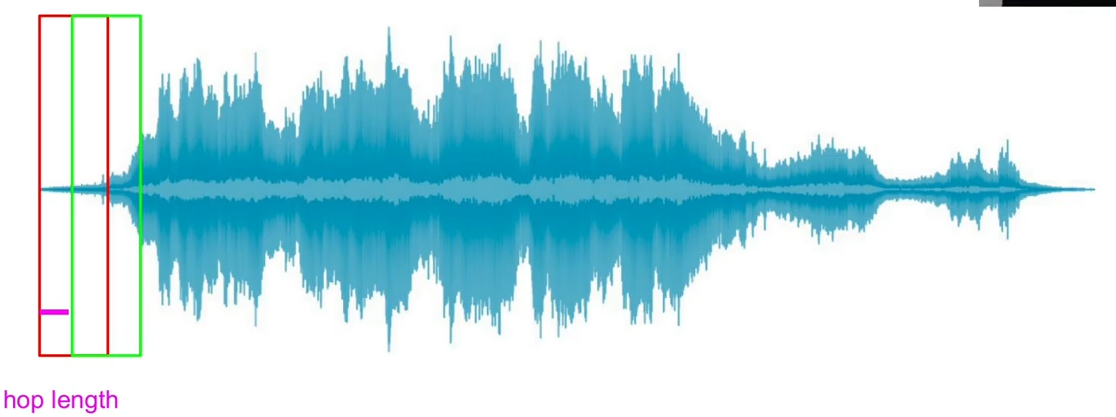

A partir desse processo, é possível definir:

* **_Frame size K_**: quantidade de amostras presentes em cada frame
* **_hop length_**: quantidade de amostras deslocadas a direita a cada novo frame

Assim, o pipeline de extração de features no domínio da frequência pode ser dado por:

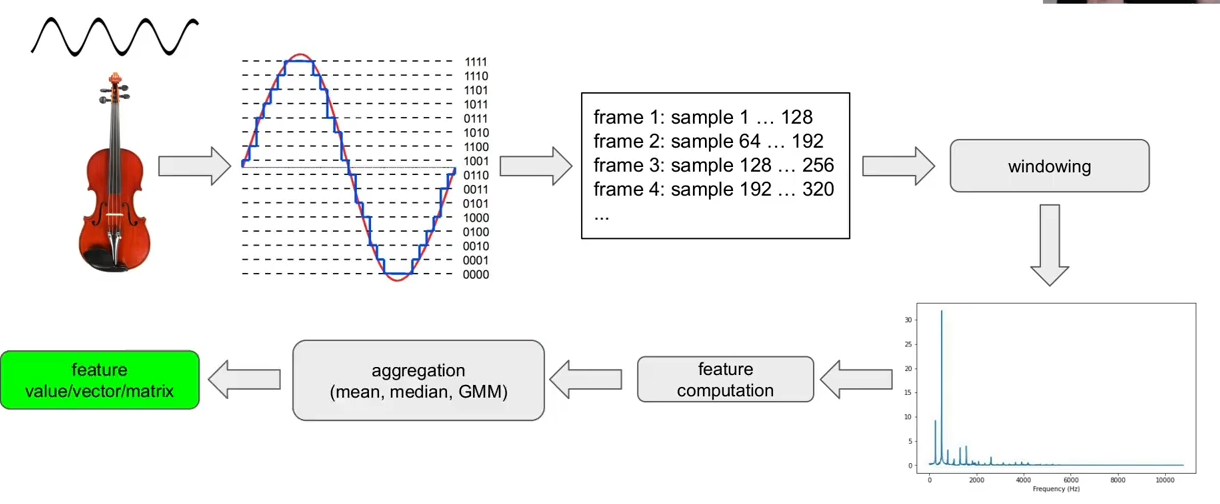

# Time-domain audio features

Após uma introdução sobre os pipelines de extração de features nos domínios do tempo e frequência, é possível agora entrar em detalhes práticos e teóricos sobre as features presentes em cada um desses domínios.